# Homework 3: Visualizing Data with Movies

Name: Eric Long

Date: 9/11/2024

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [112]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import moviepy.video.io.ImageSequenceClip

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [113]:
# define the path to the data folder
data_folder = "E:\CS185C\data\homework_3_data_orginal"

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

In [114]:
# read in the data
file_path = os.path.join(data_folder, 'Version4', 'Release4', 'interp_monthly', 'SSHDYN', 'SSHDYN_2013_01.nc')

dataset = nc4.Dataset(file_path)
SSHDYN = dataset.variables['SSHDYN'][:]
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]



C:\Users\shell\AppData\Local\Temp\ipykernel_2564\463989365.py:6: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  lat = dataset.variables['latitude'][:]
C:\Users\shell\AppData\Local\Temp\ipykernel_2564\463989365.py:7: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  lon = dataset.variables['longitude'][:]


Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [115]:
# Define the longitude and latitude bounds
min_lon = -155  
max_lon = -75  
min_lat = -20  
max_lat = 20   

# Find the indices for the longitude and latitude bounds
min_row = np.argmin(np.abs(lat - min_lat))
max_row = np.argmin(np.abs(lat - max_lat))
min_col = np.argmin(np.abs(lon - min_lon))
max_col = np.argmin(np.abs(lon - max_lon))

# Print the indices to verify
print(f"Rows: {min_row} to {max_row}, Columns: {min_col} to {max_col}")

Rows: 139 to 219, Columns: 49 to 209


Use the row and column bounds to subset the longitude, latitude, and your variable:

In [116]:
# Subset the latitude, longitude, and SSHDYN data
lon_subset = lon[min_col:max_col]
lat_subset = lat[min_row:max_row]
SSHDYN_subset = SSHDYN[0, min_row:max_row, min_col:max_col]


Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

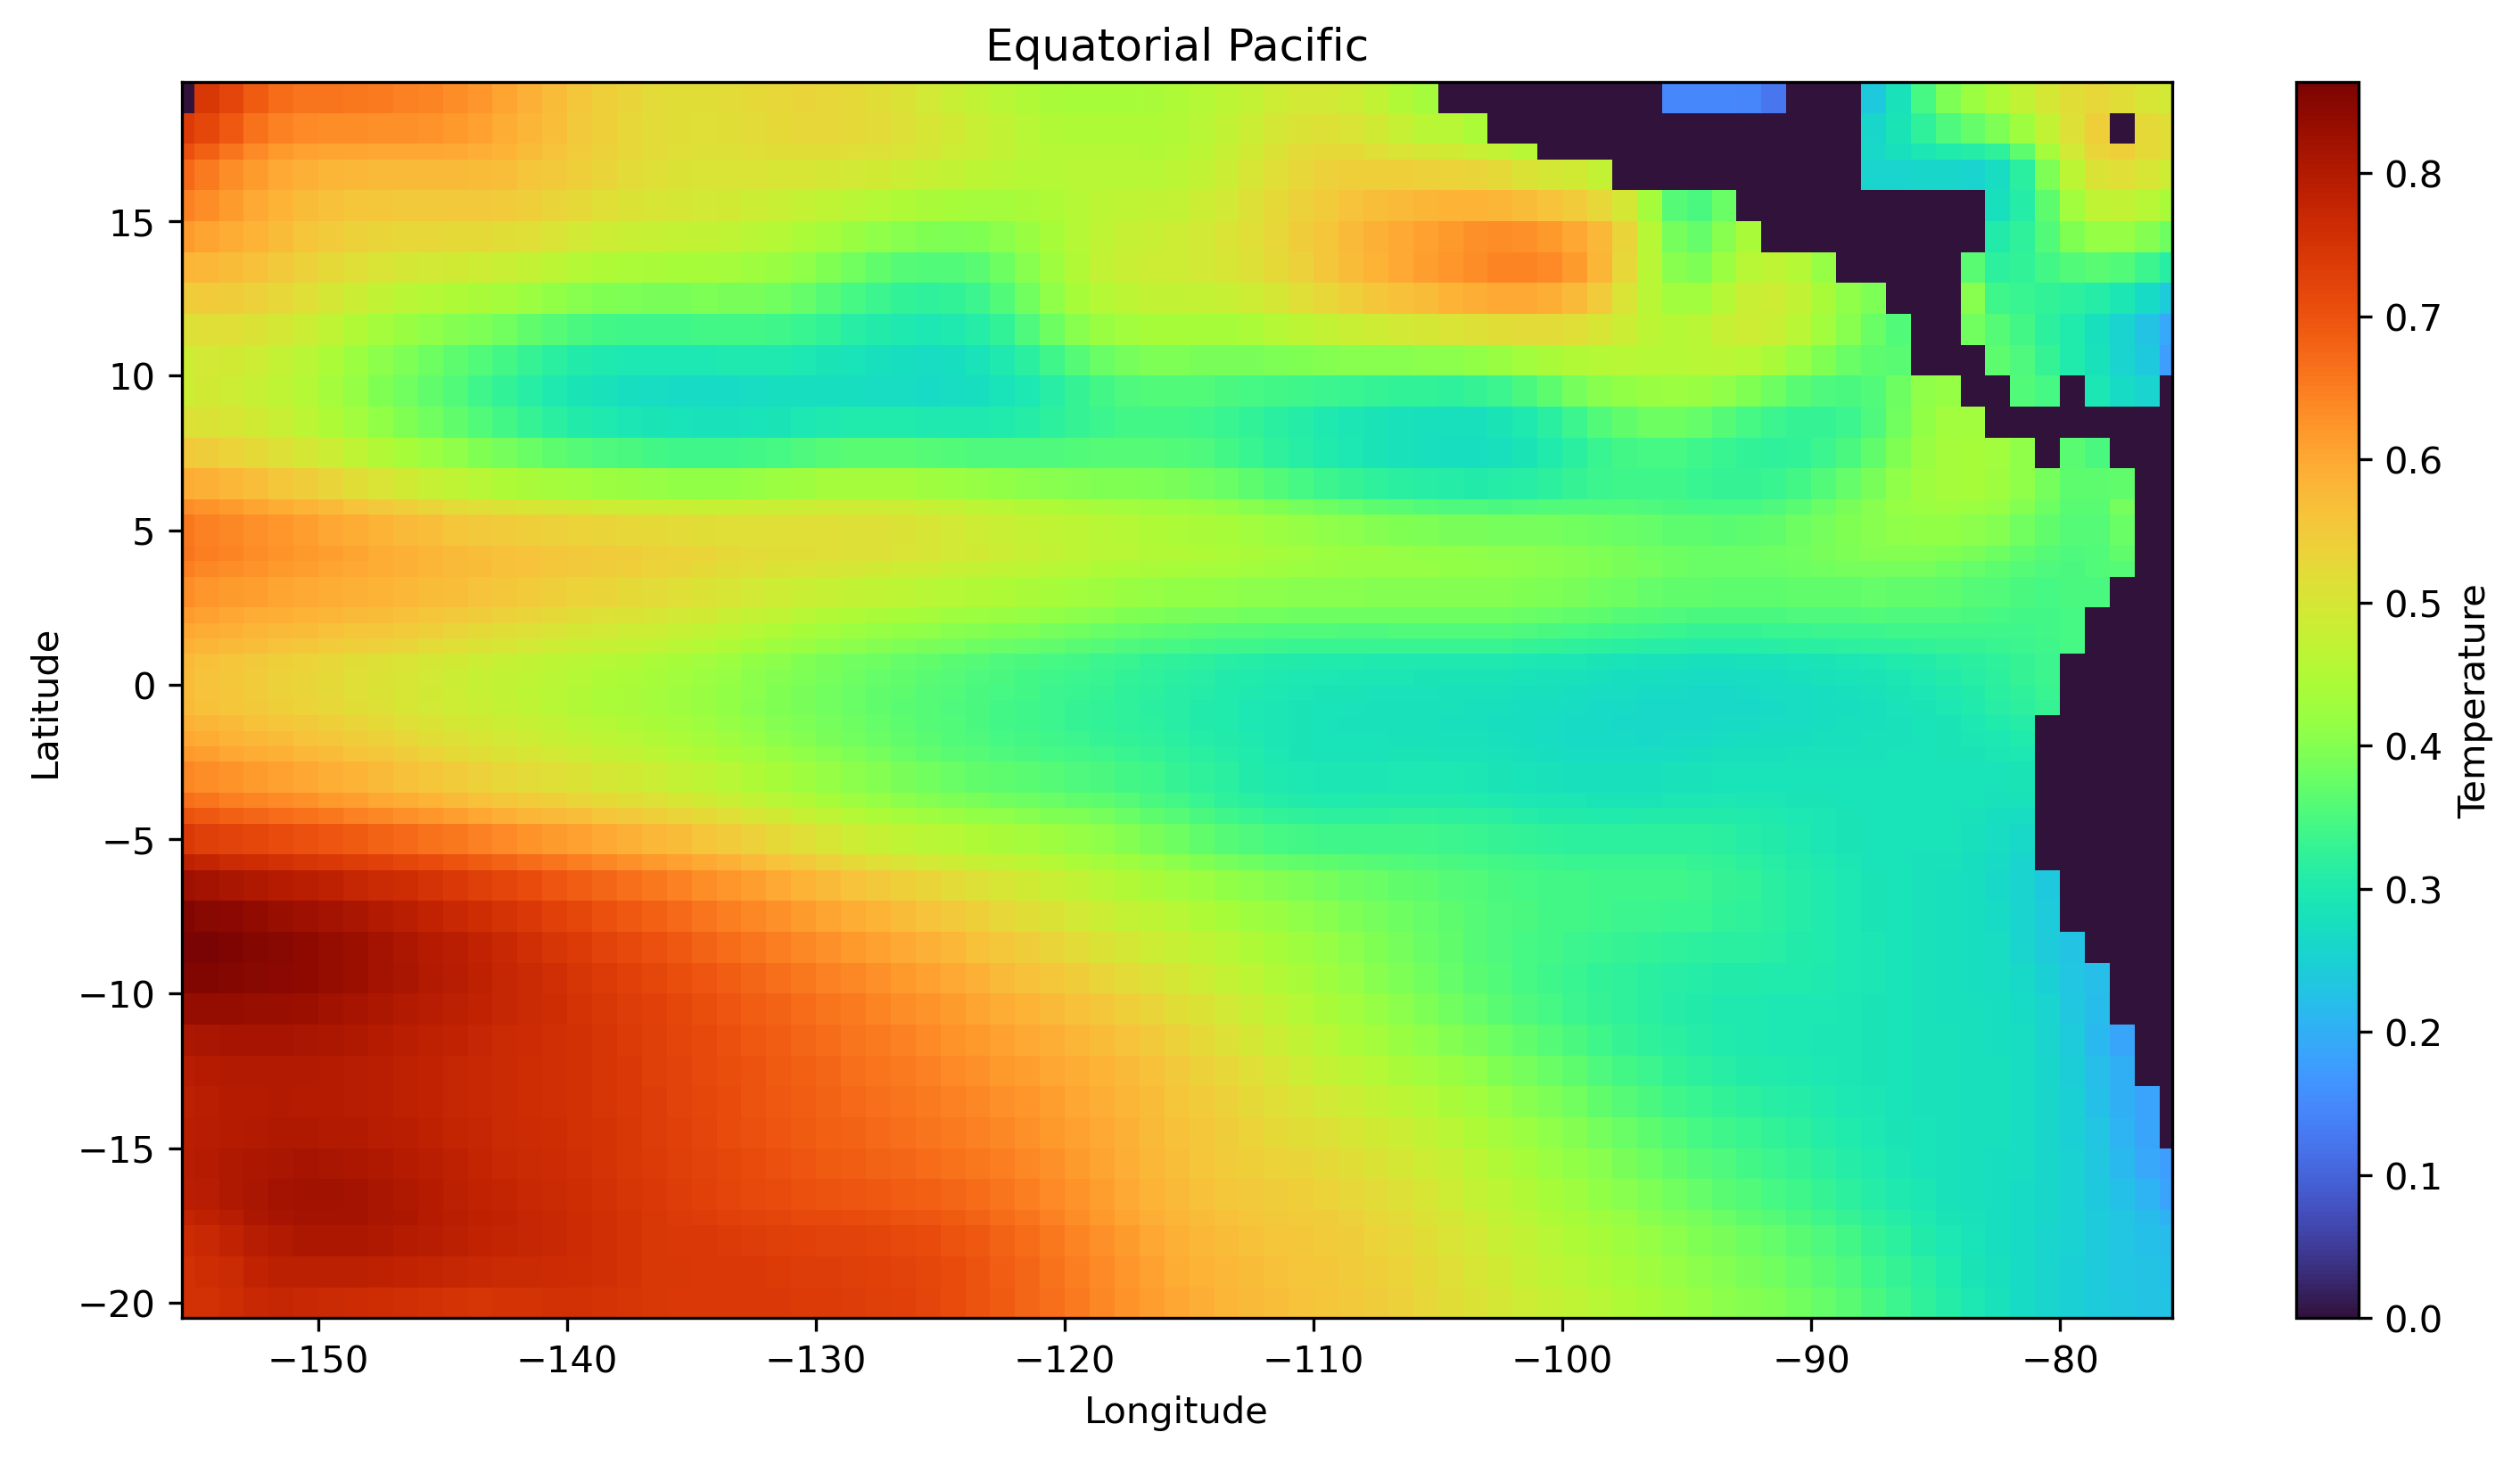

In [117]:
# make your figure here
import shutil

# Clear the output_plots directory before generating new images
output_dir = 'output_plots'
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)  # Deletes the folder and its contents
os.makedirs(output_dir)  # Recreate an empty folder

plt.figure(figsize=(12, 6), dpi=300)
plt.pcolormesh(lon_subset, lat_subset, SSHDYN_subset, shading='auto', cmap='turbo')
plt.colorbar(label='Temperature')
plt.title('Equatorial Pacific')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [118]:
def plot_panel(year, month, day):
    file_name = f'SSHDYN_{year}_{month:02d}.nc'
    file_path = os.path.join(data_folder, 'Version4', 'Release4', 'interp_monthly', 'SSHDYN', file_name)
    
    dataset = nc4.Dataset(file_path)
    SSHDYN = dataset.variables['SSHDYN'][:]
    lon = dataset.variables['longitude'][:]
    lat = dataset.variables['latitude'][:]
    
    SSHDYN_subset = SSHDYN[0, min_row:max_row, min_col:max_col]
    lon_subset = lon[min_col:max_col]
    lat_subset = lat[min_row:max_row]
    
    plt.figure(figsize=(8, 4), dpi=300)
    plt.pcolormesh(lon_subset, lat_subset, SSHDYN_subset, shading='gouraud', cmap='turbo')
    
    # Add colorbar with custom ticks (no need for cbar variable)
    plt.colorbar(label='Temperature (°C)', ticks=[20, 22, 24, 26, 28, 30])

    plt.title(f'Equatorial Pacific (Year: {year}, Month: {month})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    output_dir = 'output_plots'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    output_file = os.path.join(output_dir, f'ssh_plot_{year}_{month:02d}_{day:02d}.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    # Clear and close figures to free up memory
    plt.clf()
    plt.close()


Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

In [119]:
# loop through the data and make a plot for each day
start_year = 1992
end_year = 2012

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        plot_panel(year, month, 1)

C:\Users\shell\AppData\Local\Temp\ipykernel_2564\2224636250.py:7: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  lon = dataset.variables['longitude'][:]
C:\Users\shell\AppData\Local\Temp\ipykernel_2564\2224636250.py:8: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  lat = dataset.variables['latitude'][:]


## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [120]:
# Make a list of files for each movie panel
output_dir = 'output_plots'
image_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.png')]



In [121]:
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

# Sort the panels
image_files = sorted(image_files)

# Set the frames per second
fps = 10  # Adjust FPS based on how fast you want the movie

# Use the ImageSequenceClip module to set up the clip
clip = ImageSequenceClip(image_files, fps=fps)

# Write the video to a file with multithreading and increased buffer size
output_movie_path = 'output_movie.mp4'
clip.write_videofile(output_movie_path, codec='libx264', threads=4, audio_bufsize=100000)

print(f"Movie saved as {output_movie_path}")

Moviepy - Building video output_movie.mp4.
Moviepy - Writing video output_movie.mp4



Moviepy - Done !
Moviepy - video ready output_movie.mp4
Movie saved as output_movie.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

Answer:
From the movie I see that there is warming in the sea surface temperatures in the equatorial pacific which stretches from the coast of South America towards the central and western Pacific Ocean. This is also known as an el nino, which is when trade winds are weakened which allow for warm water from the western pacific to move eastward. 
